### Download data from NBP about flat prices. Data is in xlsx format, it contains two seperate spreadsheets "rynek pierwotny" i "rynek wtórny" and theare are two tables in each spreadsheet: transactional and offer prices.

In [35]:
url = "https://www.nbp.pl/publikacje/rynek_nieruchomosci/ceny_mieszkan.xlsx"

Downloading the data

In [36]:
from urllib import request

path = '../data/prices.xlsx'
# Download remote and save locally
data = request.urlretrieve(url, path)

Load data into padas dataset. I will analize only data for new constructions - "rynek pierwotny"

In [37]:
import pandas as pd
import numpy as np

df = pd.read_excel(path,sheet_name=1)

In [38]:
df.head(10)

,Rynek pierwotny,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,Primary market,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PLN/1 sq.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Ceny ofertowe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,średnia,NaN,NaN,NaN
3,NaN,Offer prices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,mean,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7 cities,10 cities,6 cities (without Warszawa),NaN
5,Kwartał,Białystok,Bydgoszcz,Gdańsk,Gdynia,Katowice,Kielce,Kraków,Lublin,Łódź,...,Poznań,Rzeszów,Szczecin,Warszawa,Wrocław,Zielona Góra,7 miast,10 miast,6 miast bez Warszawy,9 miast
6,III 2006,2727,3243,5004,4937,3986.27,2918.644443,6021,3456,3210,...,3620.845241,2656,3233.916487,5605,3211,2499.00893,3590.503415,2663.155087,4231,2813.827481
7,IV 2006,2727,3947,6199,5284,4062.31,3492.617589,7929,3314,4237,...,4725.658134,3013,3575.024357,6186,3777,2768.751404,5368.79462,3219.546861,4923.359666,3141.894314
8,I 2007,4181,4501,6437,6466,4518.37,3381.718956,8247,3604,4927,...,6444.721994,3469,3831.400406,7302,7062.85905,2499.814669,6499.214997,3275.503686,6121.367643,3172.595629
9,II 2007,4725,5700,7999,8934,5180.56,3901.57831,8129,4143,5453,...,7242.73,3517,4932.747279,7523,5289,3258.090803,6784.602588,3922.505883,6610.170027,3468.662814


Excel file is messy, lets pict only first 18 columns (offer prices, last for columns are summaries for few cities), and get rid of first 5 rows (empties with some additinal info)

In [39]:
#pick row nr 5 as columns names
cols = df.iloc[5:6, 0:18].values.tolist()
#slice the dataframe
df = df.iloc[6:, 0:18]
#and change its column names
df.columns = cols[0]
#rename Kwartał for eas of use
df = df.rename(columns={'Kwartał':'Quarter'})
df

,Quarter,Białystok,Bydgoszcz,Gdańsk,Gdynia,Katowice,Kielce,Kraków,Lublin,Łódź,Olsztyn,Opole,Poznań,Rzeszów,Szczecin,Warszawa,Wrocław,Zielona Góra
6,III 2006,2727,3243,5004,4937,3986.27,2918.644443,6021,3456,3210,4000,3342.843092,4769.933415,2862,3214.980636,5873,4750,2754.275993
7,IV 2006,2727,3947,6199,5284,4062.31,3492.617589,7929,3314,4237,4800,NaN,4827.2275,3401,3679.123336,6095,5759,2869.297734
8,I 2007,4181,4501,6437,6466,4518.37,3381.718956,8247,3604,4927,5149,NaN,7274.746093,3420,4749.124321,7509,6308.702547,2871.939482
9,II 2007,4725,5700,7999,8934,5180.56,3901.57831,8129,4143,5453,4776,NaN,7360.018661,4080,5049.969372,8000,6294,4153.489905
10,III 2007,4199,4994,8053,8114,6235.53,4651.056569,8420,4645,5201,4900,4784.143691,6837.76137,4069,5034.720763,8740,6444.287532,4207.569891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,IV 2021,8154.667964,8102.672213,11185.360925,10942.299978,8384.231834,6768.737773,11010.476395,7897.4,8117.335312,7202.668,7146.702739,9199.547977,7776.045525,9173.285955,11819.776106,10188.736321,7128.88143
68,I 2022,8317.783907,8308.990556,11356.052868,11342.464485,8849.635886,7123.739258,11157.350002,8170.49,8145.137193,7809.562,6837.903353,9841.233701,8101.905032,9413.58943,12517.311573,10351.791121,7295.015572
69,II 2022,8610.804227,8874.54633,11632.497925,11601.084377,9295.276303,7703.616526,11395.898639,8500.11,8481.22818,7960.45,8228.688298,9968.353303,8412.457098,9897.110676,12895.018423,10788.632174,7337.78687
70,III 2022,8722.57682,8857.123612,11619.84193,12056.590839,10107.067691,8067.553508,11728.972206,9381.58,8972.587872,8226.424,8340.77964,10140.796073,8695.758497,10968.953499,12911.995748,10962.562696,7390.078373


Now is the time to change the data type.

In [40]:
df.dtypes

Quarter         object
Białystok       object
Bydgoszcz       object
Gdańsk          object
Gdynia          object
Katowice        object
Kielce          object
Kraków          object
Lublin          object
Łódź            object
Olsztyn         object
Opole           object
Poznań          object
Rzeszów         object
Szczecin        object
Warszawa        object
Wrocław         object
Zielona Góra    object
dtype: object

Right now all the column types are object. We need to convert first column as date and the rest as floats.

In [41]:
#change price columns to floats
df[cols[0][1:]] = df[cols[0][1:]].astype(float)

#change date columns to datetime
#first convert the date format
dates = df['Quarter'].to_list()

new_dates = []
for date in dates:
    q,y = date.split()
    if q == 'I': q = 'Q1'
    if q == 'II': q = 'Q2'
    if q == 'III': q = 'Q3'
    if q == 'IV': q = 'Q4'
    new_dates.append(y + '-' + q)
new_dates

#update dates and change data type
df['Quarter'] = new_dates
df['date'] = pd.to_datetime(df['Quarter'])

#delate Quarter column
df = df.drop('Quarter', axis=1)

df.dtypes

Białystok              float64
Bydgoszcz              float64
Gdańsk                 float64
Gdynia                 float64
Katowice               float64
Kielce                 float64
Kraków                 float64
Lublin                 float64
Łódź                   float64
Olsztyn                float64
Opole                  float64
Poznań                 float64
Rzeszów                float64
Szczecin               float64
Warszawa               float64
Wrocław                float64
Zielona Góra           float64
date            datetime64[ns]
dtype: object

In [42]:
#set date as index
df = df.set_index('date')

### OK, now our price data is now clean and ready to use. Lets make few quick plots to better understand what is going on.

Text(0.5, 1.0, 'Offer prices for new flats in Poland')

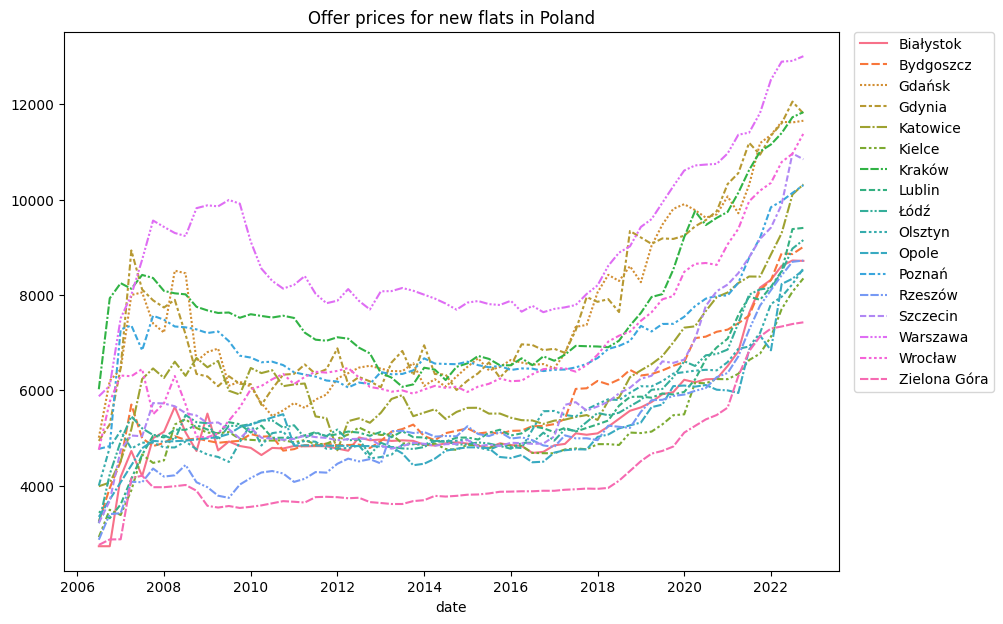

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10,7))
cities = df.columns.values.tolist()[:-1]
sns.lineplot(df, ax=ax)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Offer prices for new flats in Poland')